In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
machines = pd.read_csv("data/machines_full.csv")
machines.drop(columns=["profundidade_max","profundidade_media"],inplace=True)
variable_mapping = {
    'lexical_density': 'LD',
    'lexical_sophistication': 'LS',
    'ttr': 'TTR',
    'd-measure': 'D',
    'token_quantity': 'token_count'
}
machines.rename(columns=variable_mapping, inplace=True)

In [128]:
machines = machines.iloc[machines["text"].drop_duplicates().index]

In [129]:
machines[['system','prompt', 'model']] = machines["type"].apply(lambda x: pd.Series(x.split("/")))

In [130]:
machines.groupby(['system','prompt', 'model']).count()

MLC  MLS  \
system               prompt                        model                     
system prompt matias Enem 2022 Com Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
                     Enem 2022 Sem Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
system prompt vazio  Enem 2022 Com Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
                     Enem 2022 Sem Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   

                                                                  MLT  DCC  \
system               prompt                        model                     
system prompt matias Enem 2022 Com Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
                     Enem 2022 Sem Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
system prompt vazio  Enem 2022 Com Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
                     Enem 2022 Sem Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   

                                                                  DCT  CPC  \
system               prompt                        model                     
system prompt matias Enem 2022 Com Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
                     Enem 2022 Sem Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
system prompt vazio  Enem 2022 Com Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   
                     Enem 2022 Sem Texto Motivador gpt-3.5-turbo   25   25   
                                                   gpt-4           25   25   
                                                   maritalk        25   25   

                                                                  CPT  TS  LD  \
system               prompt                        model                        
system prompt matias Enem 2022 Com Texto Motivador gpt-3.5-turbo   25  25  25   
                                                   gpt-4           25  25  25   
                                                   maritalk        25  25  25   
                     Enem 2022 Sem Texto Motivador gpt-3.5-turbo   25  25  25   
                                                   gpt-4           25  25  25   
                                                   maritalk        25  25  25   
system prompt vazio  Enem 2022 Com Texto Motivador gpt-3.5-turbo   25  25  25   
                                                   gpt-4  

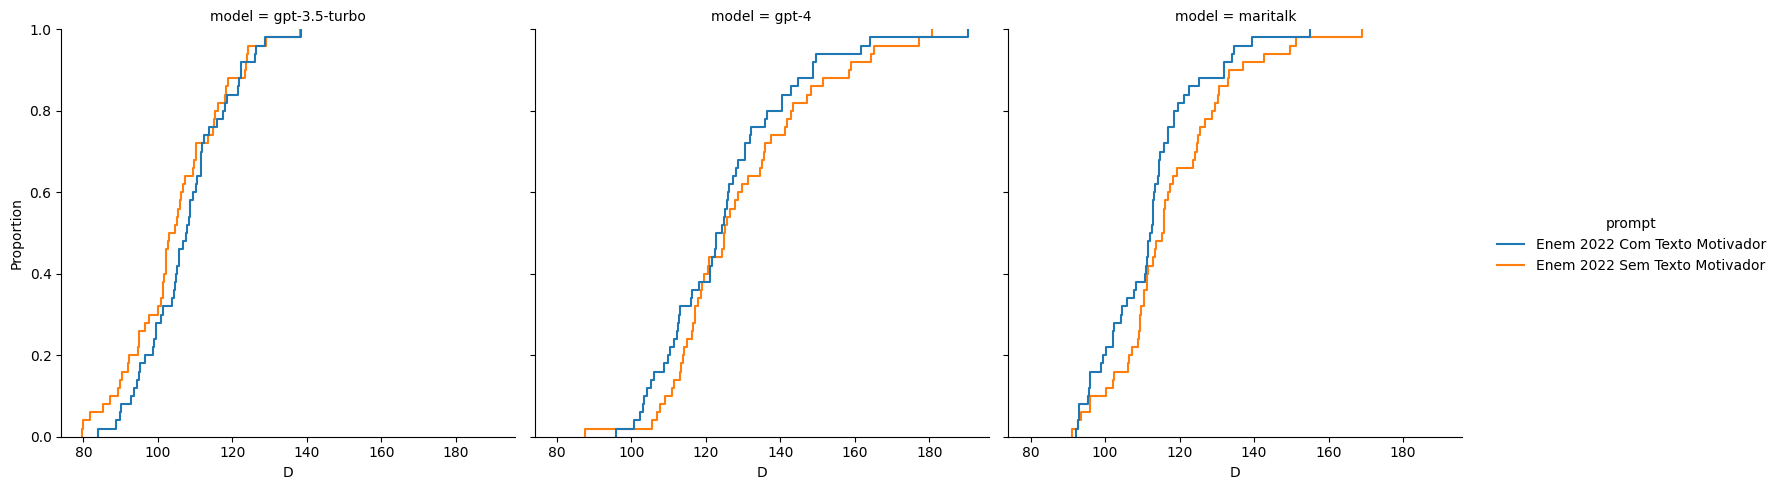

In [131]:
sns.displot(machines,hue="prompt",x="D",col="model",
            kind="ecdf",
            # fill=True
            )

In [132]:
from scipy.stats import ttest_ind
from scipy.stats import anderson


group = 'system'
grouped_data = machines.groupby(group)

group1 = grouped_data.get_group(machines[group].unique()[0])
group2 = grouped_data.get_group(machines[group].unique()[1])

ttest_results = {
    'Feature': [],
    'T-Statistic': [],
    'P-Value': [],
    'Significant': [],
    'Normality': []
}
for column in machines.select_dtypes(include='number').columns:
    # Extract the data for each group for the current column
    data1 = group1[column]
    data2 = group2[column]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(data1, data2,permutations=100)
    
    # Determine if the result is significant (p-value < 0.05)
    significant = p_value < 0.05

    normal = anderson(data1, 'norm').statistic < 0.05
    
    # Store the results in the dictionary
    ttest_results['Feature'].append(column)
    ttest_results['T-Statistic'].append(t_stat)
    ttest_results['P-Value'].append(p_value)
    ttest_results['Significant'].append(significant)
    ttest_results['Normality'].append(normal)

results_df = pd.DataFrame(ttest_results)
results_df.sort_values(by = 'Significant',inplace=True)
results_df

,Feature,T-Statistic,P-Value,Significant,Normality
2,MLT,-0.752807,0.524752,False,False
3,DCC,-1.168609,0.217822,False,False
4,DCT,0.551364,0.514851,False,False
9,LS,0.384152,0.712871,False,False
0,MLC,-4.214855,0.009901,True,False
1,MLS,14.517011,0.009901,True,False
5,CPC,-6.226710,0.009901,True,False
6,CPT,-2.475329,0.009901,True,False
7,TS,6.827105,0.009901,True,False
8,LD,-7.469243,0.009901,True,False


In [133]:
significant_ones = results_df[results_df["Significant"]== True]
significant_ones

,Feature,T-Statistic,P-Value,Significant,Normality
0,MLC,-4.214855,0.009901,True,False
1,MLS,14.517011,0.009901,True,False
5,CPC,-6.226710,0.009901,True,False
6,CPT,-2.475329,0.009901,True,False
7,TS,6.827105,0.009901,True,False
8,LD,-7.469243,0.009901,True,False
10,TTR,2.218538,0.049505,True,False
11,D,2.428868,0.029703,True,False
12,token_count,2.976731,0.009901,True,False


In [134]:
# Group the DataFrame by "model"
grouped = machines.groupby("model")

# Dictionary to store the differences for each model
differences_by_model = {}

# Iterate over each group (model)
for model, group in grouped:
    # Select the columns specified in "significant_ones"
    significant_columns = group[significant_ones["Feature"].to_list() + ["system"]]
    
    # Compute the difference between the two distinct "system" classes
    system_diff = significant_columns.groupby("system").diff().dropna()
    
    # Store the differences for the current model
    differences_by_model[model] = system_diff

differences_df = pd.concat(differences_by_model, names=["model"]).groupby("model").mean()

differences_df

,MLC,MLS,CPC,CPT,TS,LD,TTR,D,token_count
model,,,,,,,,,
gpt-3.5-turbo,0.003794,0.059655,-0.002717,0.133139,-0.004611,-0.000197,-0.000450,-0.462075,-0.591837
gpt-4,-0.006415,-0.105941,0.013197,0.005871,0.001232,0.001045,0.000006,0.749617,2.010204
maritalk,0.168962,-0.008390,0.010241,-0.161054,0.001876,0.000516,0.000624,0.406399,0.071429


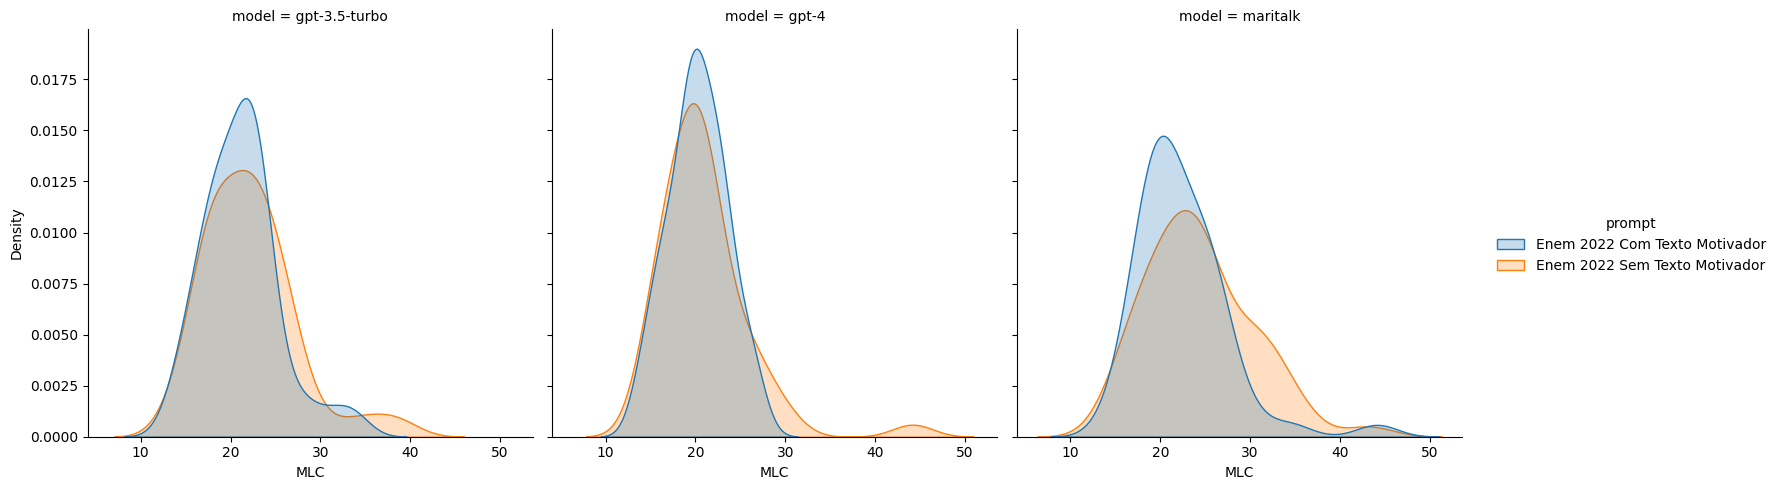

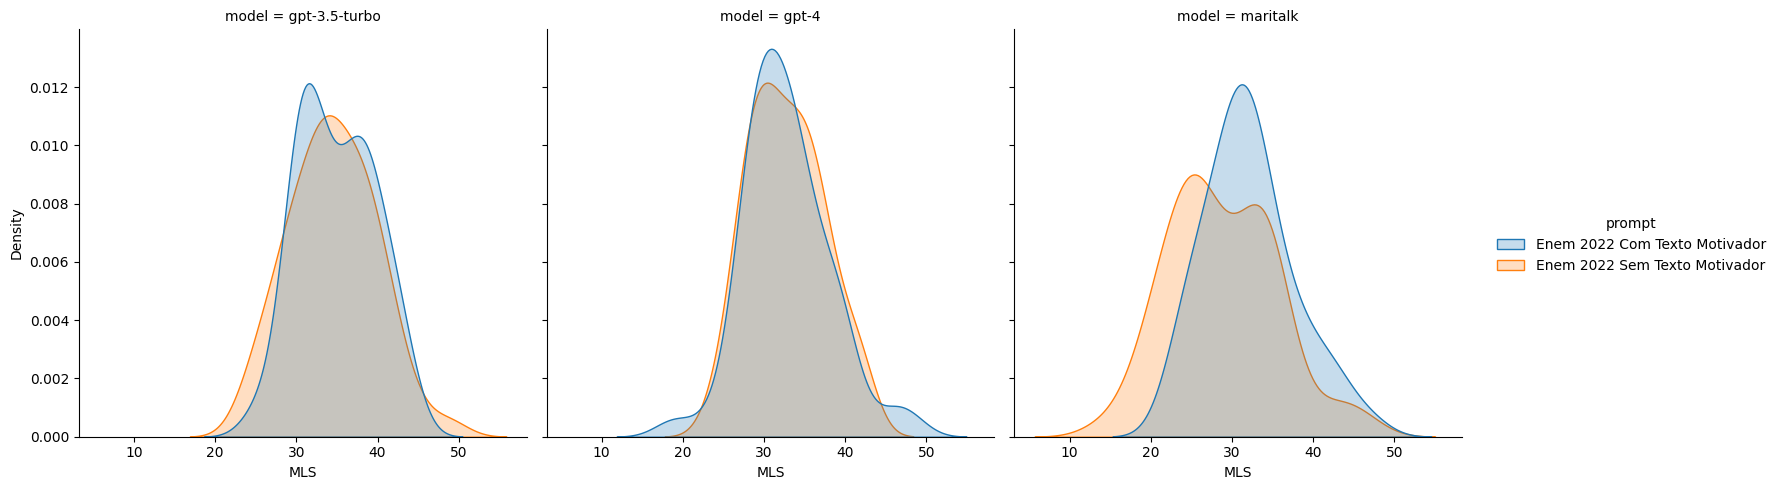

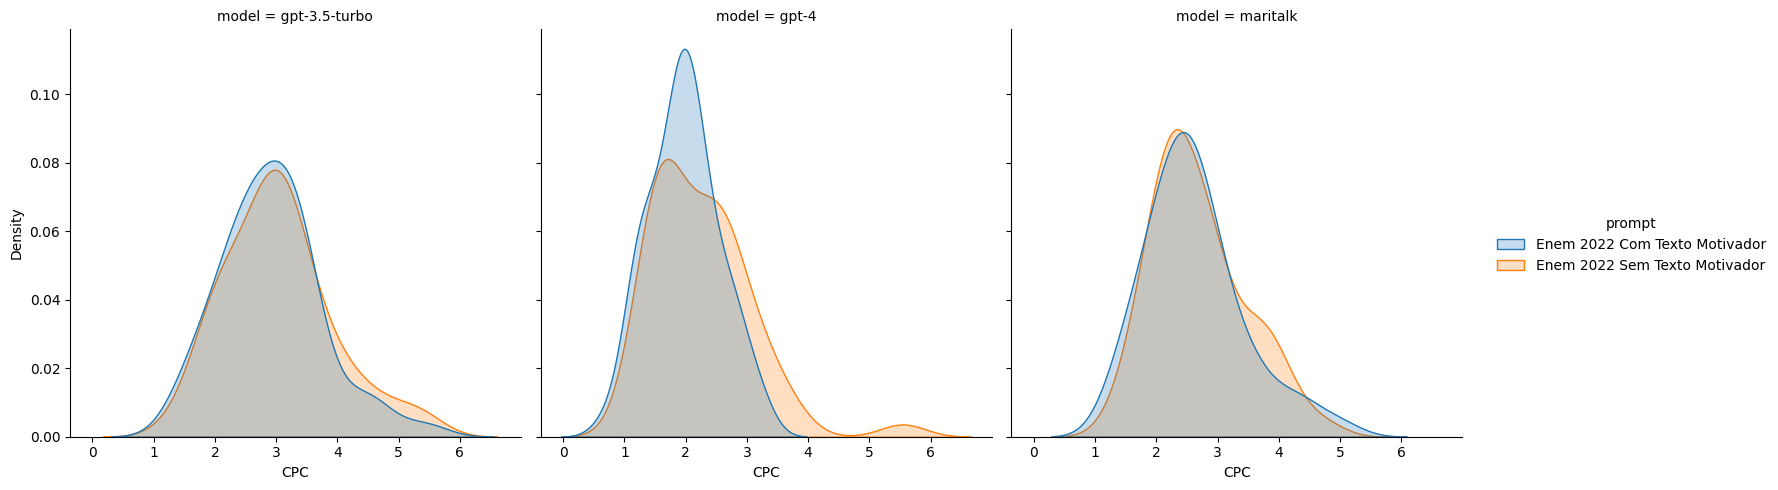

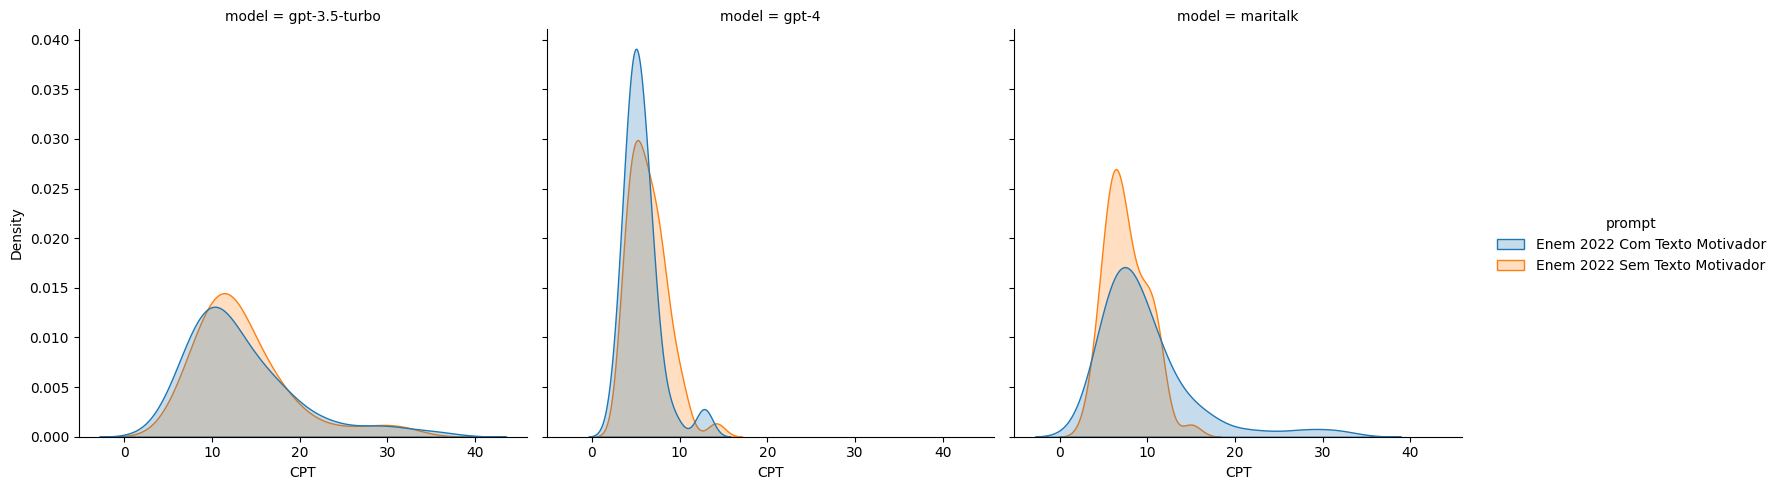

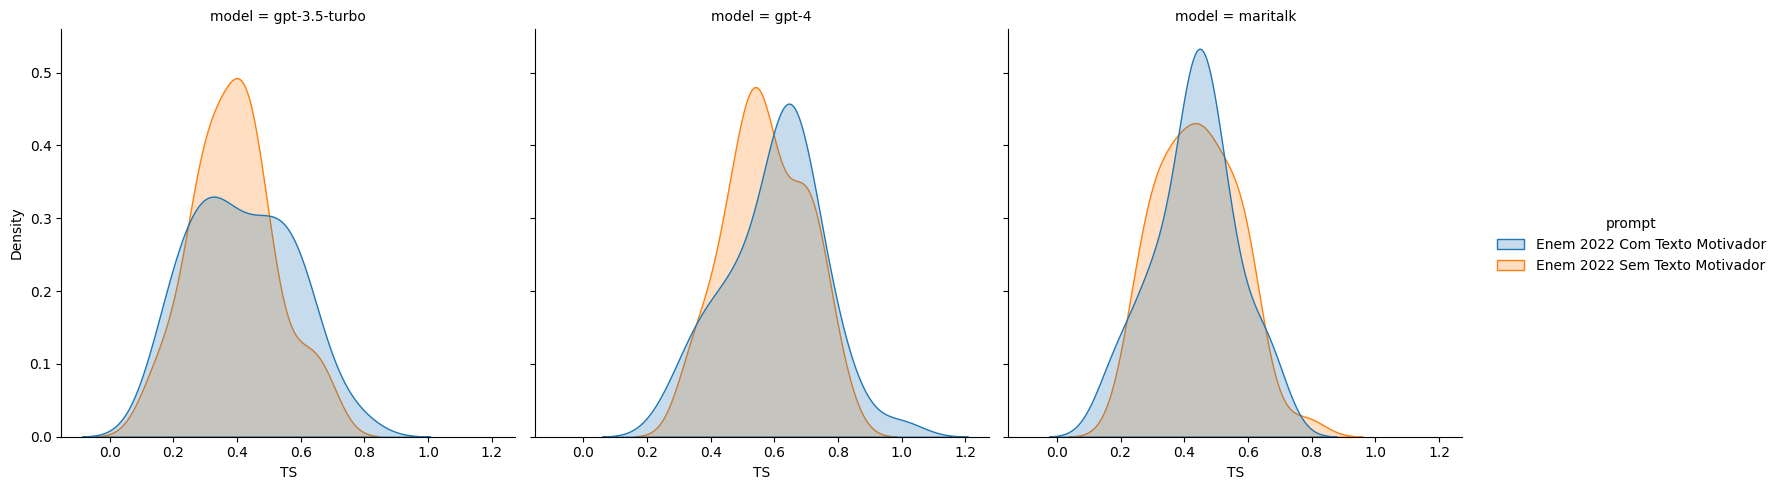

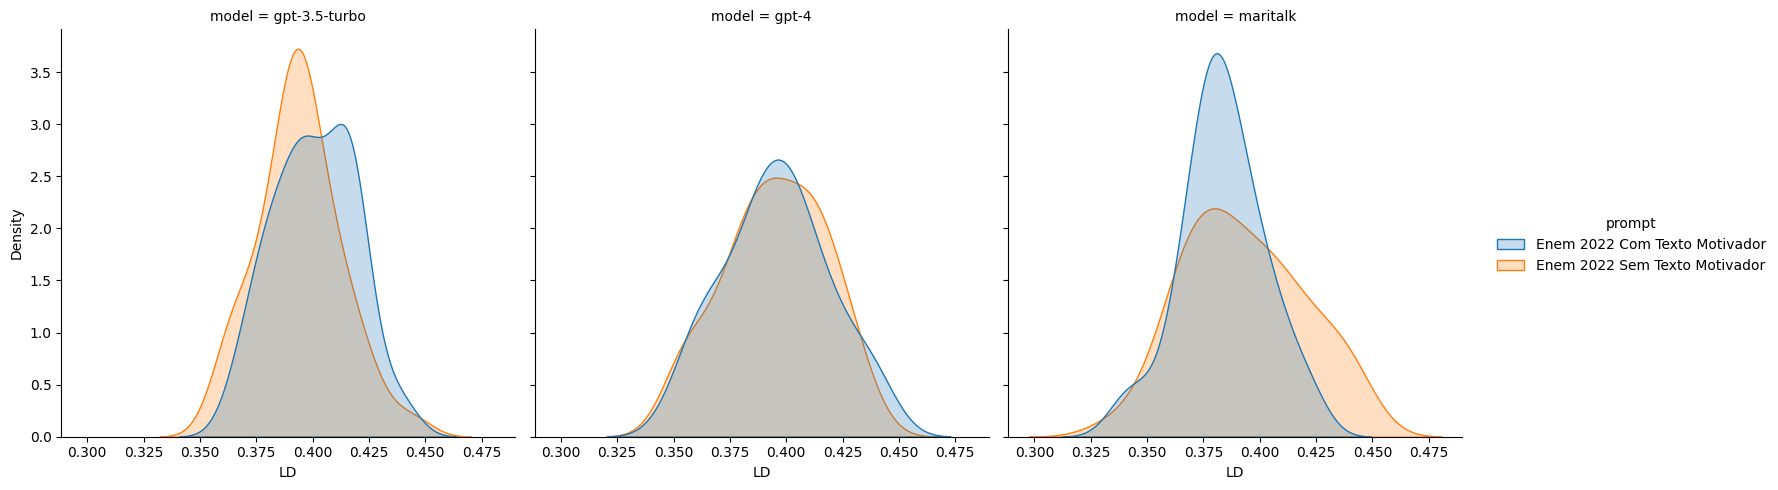

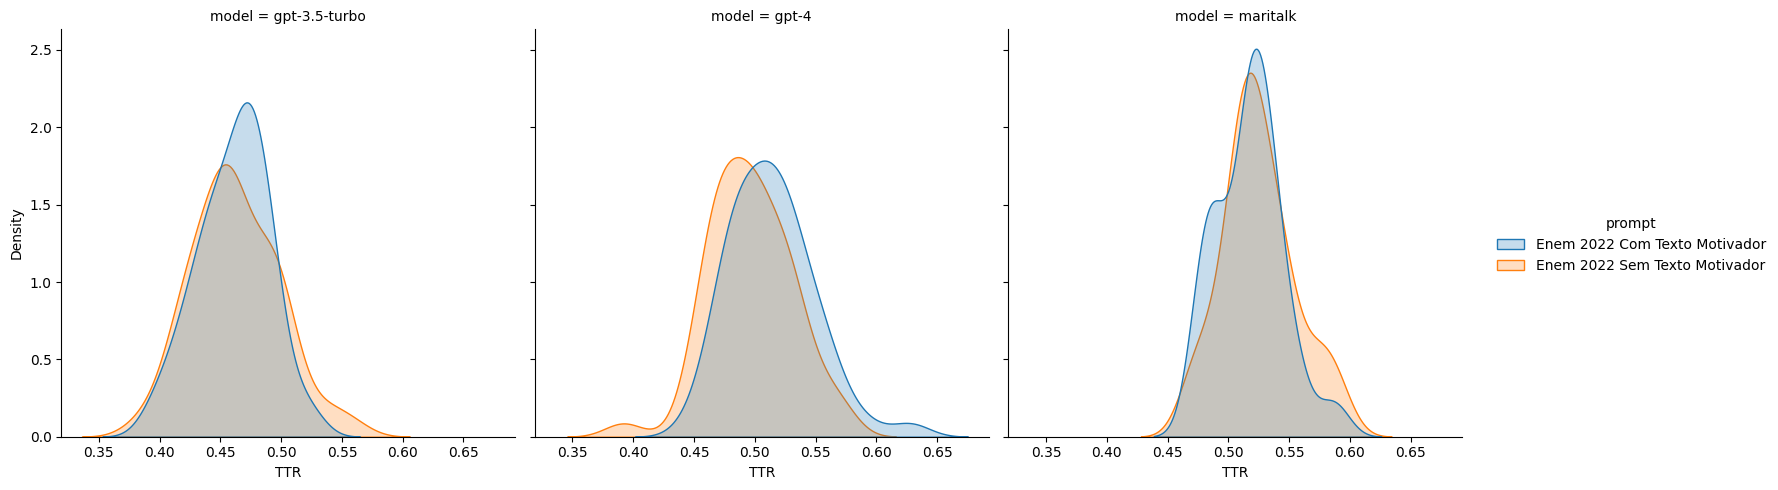

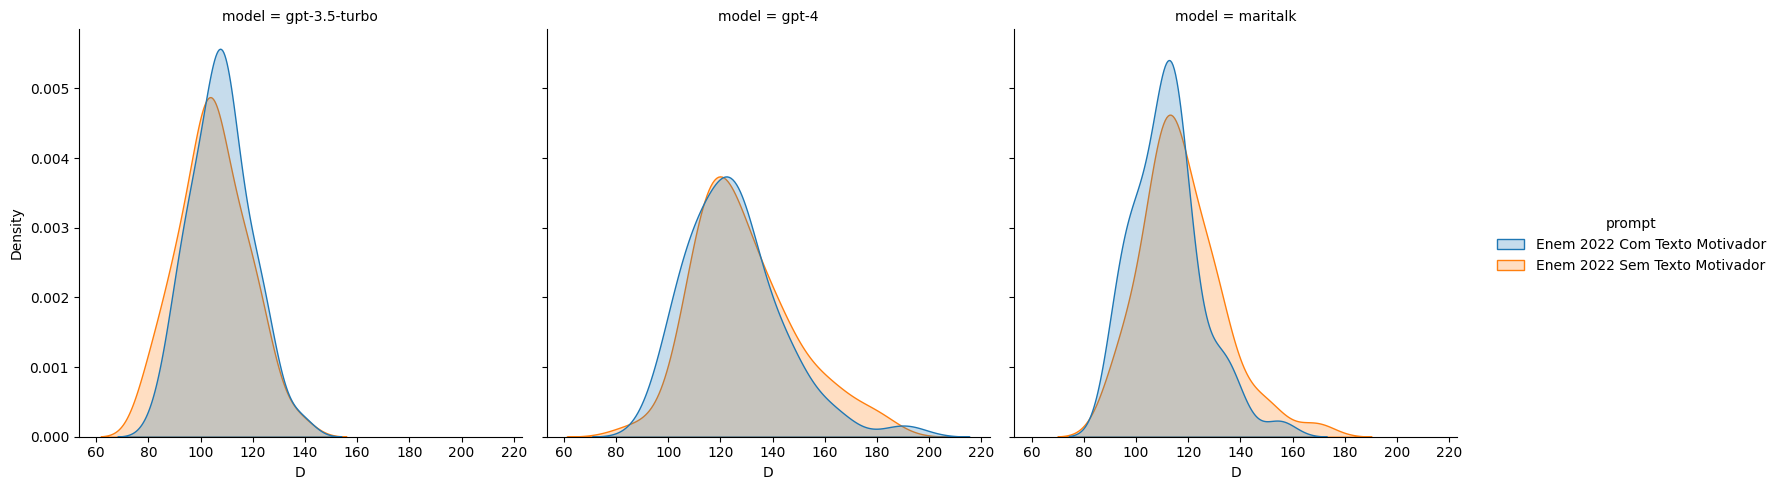

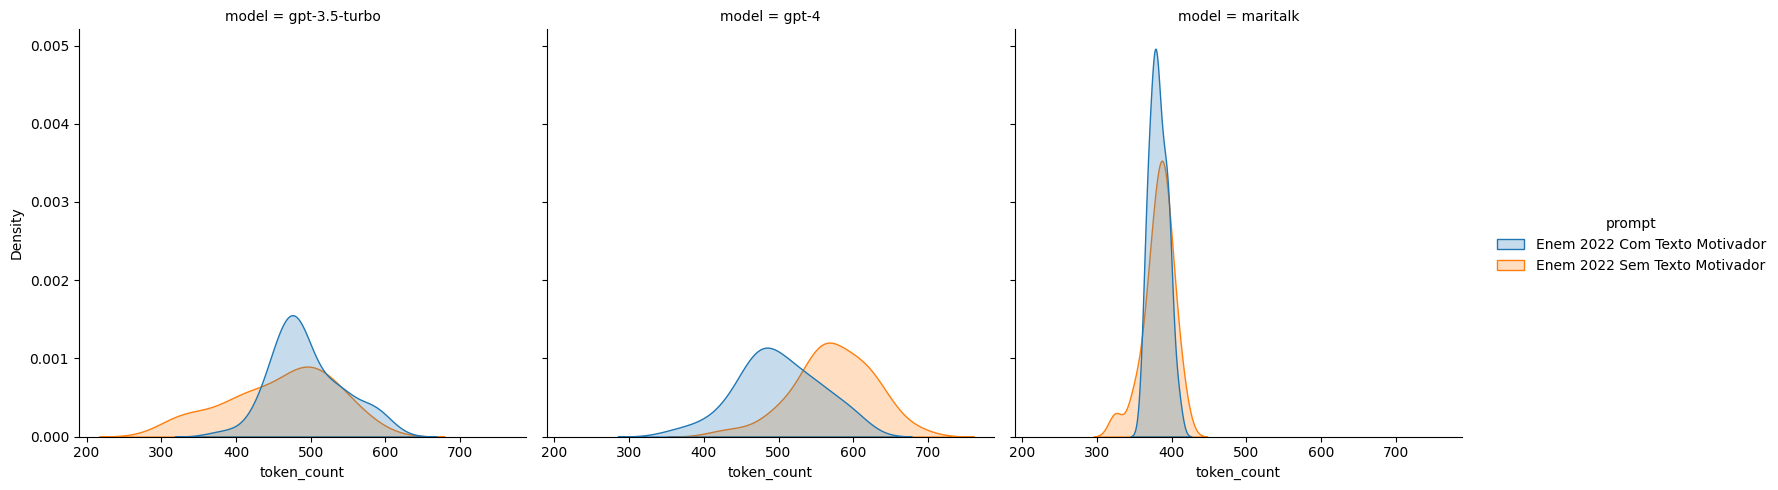

In [135]:
for f in significant_ones["Feature"]:
    # sns.boxplot(matias,y="model",x=f,hue="prompt")
    sns.displot(machines,hue="prompt",x=f,col="model",
                kind="kde",
                fill=True
                )    # sns.displot(matias,hue="prompt",x=f,col="model",kind="ecdf")
    plt.show()

<Axes: xlabel='variable', ylabel='value'>

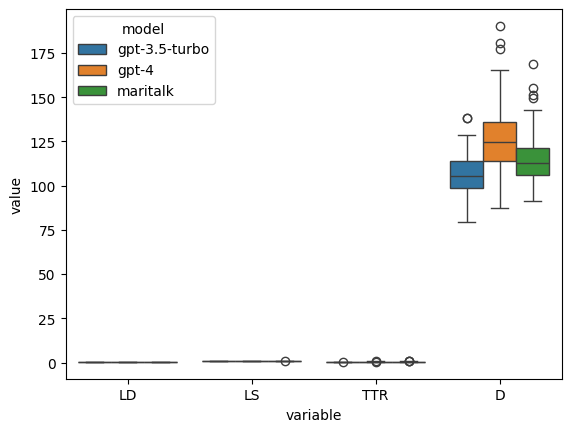

In [136]:
lexical_features = ["LD","LS","TTR","D"]
sns.boxplot(data=machines.melt(id_vars='model', value_vars=lexical_features), x="variable", y="value", hue="model")
